遷移學習 Mango Classification: pick a pre-trained model

### Import必要套件

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.densenet import preprocess_input

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp '/content/drive/MyDrive/上課/TFkeras/mango.zip' /content

In [4]:
!unzip /content/mango.zip -d /content/

串流輸出內容已截斷至最後 5000 行。
  inflating: /content/mango/Train/00874.jpg  
  inflating: /content/mango/Train/00875.jpg  
  inflating: /content/mango/Train/00876.jpg  
  inflating: /content/mango/Train/00877.jpg  
  inflating: /content/mango/Train/00878.jpg  
  inflating: /content/mango/Train/00879.jpg  
  inflating: /content/mango/Train/00880.jpg  
  inflating: /content/mango/Train/00881.jpg  
  inflating: /content/mango/Train/00883.jpg  
  inflating: /content/mango/Train/00885.jpg  
  inflating: /content/mango/Train/00886.jpg  
  inflating: /content/mango/Train/00887.jpg  
  inflating: /content/mango/Train/00888.jpg  
  inflating: /content/mango/Train/00889.jpg  
  inflating: /content/mango/Train/00892.jpg  
  inflating: /content/mango/Train/00893.jpg  
  inflating: /content/mango/Train/00894.jpg  
  inflating: /content/mango/Train/00895.jpg  
  inflating: /content/mango/Train/00896.jpg  
  inflating: /content/mango/Train/00897.jpg  
  inflating: /content/mango/Train/00898.jpg  
  inflating: 

In [13]:
image_size = [224, 224]
batch_size = 64

### mango 分A B C 等級
載入mango數據集 從 csv檔

In [14]:
train_dir = '/content/mango/Train/'
test_dir = '/content/mango/Dev/'
dftrain = pd.read_csv(r'/content/mango/train.csv')
dftest = pd.read_csv(r'/content/mango/dev.csv')
print(dftrain.shape, dftest.shape)
print(dftrain.head())

(5600, 2) (800, 2)
    image_id label
0  00002.jpg     C
1  00003.jpg     C
2  00004.jpg     B
3  00005.jpg     A
4  00007.jpg     A


In [15]:
le = LabelEncoder()
dftrain['le'] = le.fit_transform(dftrain['label'])
dftest['le'] = le.transform(dftest['label'])
print(list(le.classes_))
print(dftrain['le'].to_numpy().tolist()) #把ABC改成012

['A', 'B', 'C']
[2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 1, 0, 2,

In [16]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "mango/Train",
      validation_split=0.2,
      subset="training",
      seed=1001,
      labels=dftrain['le'].to_numpy().tolist(),
      image_size=image_size,
      batch_size=None,
)

Found 5600 files belonging to 3 classes.
Using 4480 files for training.


In [17]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "mango/Train",
      validation_split=0.2,
      subset="validation",
      seed=1001,
      labels=dftrain['le'].to_numpy().tolist(),
      image_size=image_size,
      batch_size=None,
)

Found 5600 files belonging to 3 classes.
Using 1120 files for validation.


In [18]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "mango/Dev",
      validation_split=0.0,
      shuffle=False,
      seed=1001,
      labels=dftest['le'].to_numpy().tolist(),
      image_size=image_size,
      batch_size=None,
)

Found 800 files belonging to 3 classes.


In [19]:
# initializing label list and feeding in classes/indices
labels = train_ds.class_names

In [20]:
labels

['0', '1', '2']

In [25]:
def flip(x):
    """
    flip image(翻轉影像)
    """
    x = tf.image.random_flip_left_right(x)  # 隨機左右翻轉影像
    return x

def color(x):
    """
     Color change(改變顏色)
    """
    x = tf.image.random_hue(x, 0.08)  # 隨機調整影像色調
    x = tf.image.random_saturation(x, 0.6, 1.6)  # 隨機調整影像飽和度
    x = tf.image.random_brightness(x, 0.05)  # 隨機調整影像亮度
    x = tf.image.random_contrast(x, 0.7, 1.3)  # 隨機調整影像對比度
    return x

def rotate(x):
    """
    Rotation image(影像旋轉)
    """
    # 隨機選轉n次(通過minval和maxval設定n的範圍)，每次選轉90度
    x = tf.image.rot90(x, tf.random.uniform(shape=[], minval=1, maxval=4, dtype=tf.int32))
    return x

def zoom(x, scale_min=0.6, scale_max=1.4):
    """
    Zoom Image(影像縮放)
    """
    h, w, c = x.shape
    scale = tf.random.uniform([], scale_min, scale_max)  # 隨機縮放比例
    sh = h * scale  # 縮放後影像長度
    sw = w * scale  # 縮放後影像寬度
    x = tf.image.resize(x, (sh, sw))  # 影像縮放
    x = tf.image.resize_with_crop_or_pad(x, h, w)  # 影像裁減和填補
    return x

def parse_aug_fn(x, y): # 更正
    """
    Image Augmentation(影像增強) function
    """
    x = tf.cast(x, tf.float32)
    x = tf.keras.applications.efficientnet_v2.preprocess_input(x) ## 更正
    x = flip(x)  # 隨機水平翻轉
    # 觸發顏色轉換機率50%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.5, lambda: color(x), lambda: x) # tf.cond: tensorflow的if / else條件判斷式
    # 觸發影像旋轉機率0.25%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.75, lambda: rotate(x), lambda: x)
    # 觸發影像縮放機率50%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.5, lambda: zoom(x), lambda: x)
    return x, tf.one_hot(y, 3) #分幾類

def parse_fn(x, y): # 更正
    x = tf.cast(x, tf.float32)  # 影像標準化
    x = tf.keras.applications.efficientnet_v2.preprocess_input(x) ## 更正
    return x, tf.one_hot(y, 3)

In [26]:
AUTOTUNE = tf.data.experimental.AUTOTUNE  # 自動調整模式

train_ds = train_ds.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
train_ds = train_ds.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

val_ds = val_ds.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
val_ds = val_ds.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

test_ds = test_ds.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
test_ds = test_ds.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

In [27]:
# # 創建模型(不包含全連接層)，最後一層卷積加上GlobalAveragePooling
# base_model = tf.keras.applications.inception_v3.InceptionV3(include_top=False,
#                                weights='imagenet',
#                                pooling='avg',
#                                input_shape=image_size+[3]) # [128, 128, 3] # w,h,c
# # 將剛創建的InceptionV3模型接上兩層全連接層，並且最後一層使用Softmax輸出
# model_1 = tf.keras.Sequential([
#     base_model,
#     layers.Dense(128, activation='relu'),
#     layers.Dense(2, activation='softmax')
# ])
# Keras新版的bug

base_model = tf.keras.applications.densenet.DenseNet201(weights='imagenet', include_top=False)
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
predictions = layers.Dense(3, activation='softmax')(x)
model_1 = keras.models.Model(inputs=base_model.input, outputs=predictions)

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:
model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, None,      │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,408 │ zero_padding2d[0… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, None,      │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, None,      │          0 │ conv2_block1_0_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, None,      │          0 │ pool1[0][0],      │
│ (Concatenate)       │ None, 96)         │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, None,      │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, None,      │          0 │ conv2_block2_0_b… │
│ (Activation)        │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, None,      │     12,288 │ conv2_block2_0_r

 Total params: 18,568,259 (70.83 MB)

 Trainable params: 18,339,203 (69.96 MB)

 Non-trainable params: 229,056 (894.75 KB)

In [29]:
# 儲存最好的網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/TFkeras/densenet_DenseNet201.keras',
                                             monitor='val_categorical_accuracy',
                                             save_best_only=True,
                                             mode='max')
# 設定停止訓練的條件(當Accuracy超過5迭代沒有上升的話訓練會終止)
model_esp = keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=5)

In [30]:
adam = optimizers.Adam(learning_rate=1e-3)
rlr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1,
                                        min_delta=0.0001)

model_1.compile(optimizer=adam,
                loss='categorical_crossentropy',
                metrics=['categorical_accuracy'])

In [31]:
history = model_1.fit(train_ds,
                        validation_data=val_ds,
                        epochs=50,
                        callbacks=[rlr, model_mckp, model_esp])

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 598s 2s/step - categorical_accuracy: 0.6532 - loss: 0.8094 - val_categorical_accuracy: 0.6304 - val_loss: 1.8547 - learning_rate: 0.0010
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 67s 946ms/step - categorical_accuracy: 0.7265 - loss: 0.6166 - val_categorical_accuracy: 0.6509 - val_loss: 2.2344 - learning_rate: 0.0010
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 68s 960ms/step - categorical_accuracy: 0.7526 - loss: 0.5541 - val_categorical_accuracy: 0.6875 - val_loss: 1.1265 - learning_rate: 0.0010
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 84s 989ms/step - categorical_accuracy: 0.7467 - loss: 0.5620 - val_categorical_accuracy: 0.7446 - val_loss: 0.5825 - learning_rate: 0.0010
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 65s 918ms/step - categorical_accuracy: 0.7462 - loss: 0.5548 - val_categorical_accuracy: 0.7348 - val_loss: 0.6094 - learning_rate: 0.0010
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 64s 914ms/step - categorical_accuracy: 0.7611 - loss: 0.5508 - val_categorical_

In [32]:
from sklearn.metrics import confusion_matrix
from tensorflow.keras import backend as K
import itertools

def get_conf_matrix(model, size, image_size):
    predictions =[]
    true_y = []
    for x,y in test_ds:
        predprob = model.predict(x)
        # decoding one-hot
        prediction = np.argmax(predprob, axis=1)
        y = np.argmax(y, axis =1)

        predictions = np.concatenate((predictions, prediction))
        true_y = np.concatenate((true_y, y))
        if len(predictions) >=size:
            break
    matrix = confusion_matrix(true_y, predictions)

    return matrix

In [34]:
model = tf.keras.models.load_model('/content/drive/MyDrive/TFkeras/densenet_DenseNet201.keras')
conf_matrix_inc = get_conf_matrix(model, 5600, image_size)
print(conf_matrix_inc[:,:])
del model
K.clear_session()

2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 157ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
[[184  58   1]
 [ 33 251   9]
 [  1  48 215]]


Confusion matrix, without normalization
[[184  58   1]
 [ 33 251   9]
 [  1  48 215]]


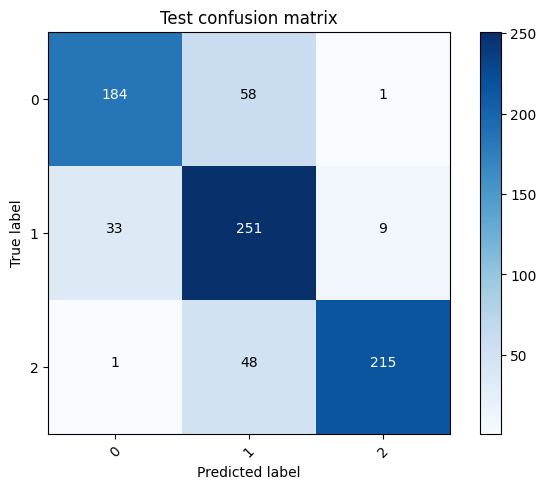

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=False`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(conf_matrix_inc, labels, title = "Test confusion matrix")

In [38]:
sum([conf_matrix_inc[i, i] for i in range(3)])/800.0

np.float64(0.8125)